***Визуализация цен недвижимости***

 *Задачи:*

   1.	Тепловая карта цен недвижимости

   2.	Гистограмма с отображением средних цен по муниципальным округам указанных выше городов

   3.	Гистограмма с отображением средней площади квартиры по муниципальным округам указанных выше городов

***Исходные данные***

 *Данные по недвижимости*

    - Яндекс недвижимость - max 25 страниц с объявлениями
   
    - Циан - max 54 страницы с объявлениями
   
    - RealtyMag - max 250 страниц с объявлениями

 *Данные по геообъектам*

    - OpenStreetMap

***Выбор библиотек***

 *Получение данных с интернета*

    - aiohttp
    - asyncio
    - concurrent.futures ProcessPoolExecutor
    - BeautifulSoup

 *Хранение и предобратботка данных*

    - pandas
    - geopandas
    - shapley
    - numpy
    - json

 *Предсказание стоимости по недостающим точкам*

    - sklearn

 *Визуализация данных*

    - folium
    - matplotlib

***Получение данных с интернета***
    
    1. Получение url адресов объявлений
    
    - создание пула url страниц с объявлениями о продаже
    - асихронное скачивание html страниц
    - параллельный парсинг информации
    - сохранение списка url адресов объявлений в txt файл
    
    2. Получение данных из объявлений о продаже
    
    - создание пула url страниц объявлений
    - асихронное скачивание html страниц
    - параллельный парсинг информации
    - сохранение данных в excel файл

In [2]:
%pip install pandas openpyxl

import pandas as pd
from IPython.display import Image

Note: you may need to restart the kernel to use updated packages.


In [25]:
df = pd.read_excel("C:/Users/Art/PycharmProjects/EPAM_final/Data_from_web/SPb_sec_app_offers.xlsx")
df.head()

Unnamed: 0    offer_id  price_per_square  live_square  \
0           0  2698189266            219665         23.9   
1           1  2695418404            146789         32.7   
2           2  2692446279            169421         24.2   
3           3  2692446276            188281         38.4   
4           4  2692446274            144737         19.0   

             microdistrict  location_lat  location_long   refresh_time  
0         Московский район     59.842802      30.303238  5 часов назад  
1  Красногвардейский район     60.028433      30.459311  5 часов назад  
2                      NaN     59.839832      30.104530  5 часов назад  
3                      NaN     59.984746      30.386071  5 часов назад  
4        Центральный район     59.923564      30.347717  5 часов назад

***Хранение и предобратботка данных***

    1. Построить сетку в границах города
    
    - получить min/max значения широты и долготы границ города
    - построить полигональную сетку в границах min/max широты и долготы
    - вписать сетку в границы города
    - убрать, если есть водоемы
    
    2. Обработка данных из объявлений о продаже
    
    - усреднить цену по объявлениям с одинаковыми координатами
    - привязать координаты объявлений к полигонам
    - усреднить цену, если несколько точек попали в один полигон
    

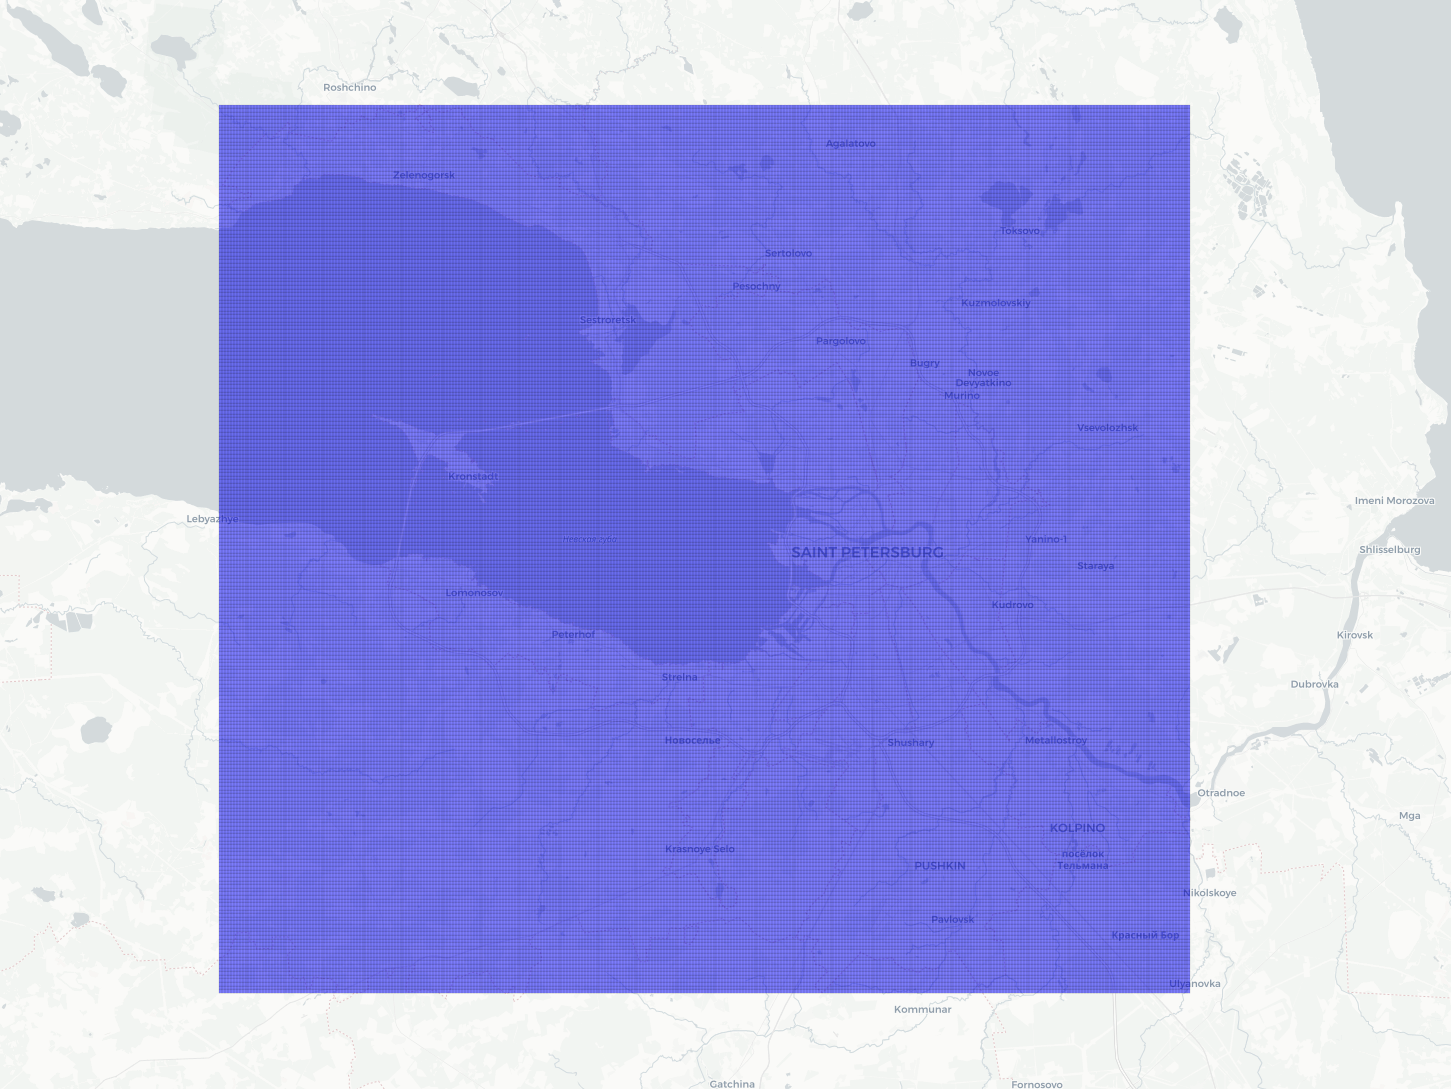

In [19]:
Image("C://Users/Art/PycharmProjects/EPAM_final/Slides/1.png")

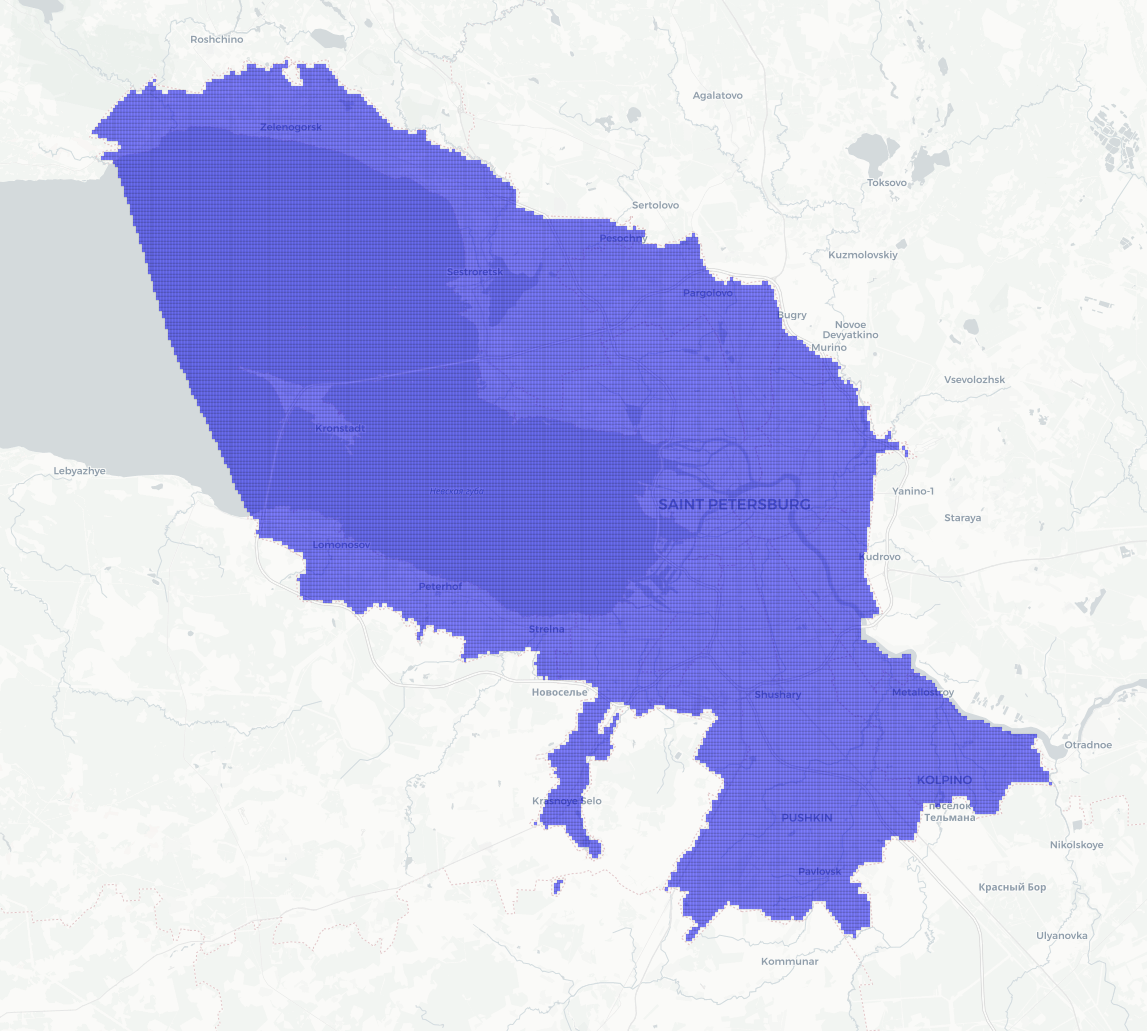

In [20]:
Image("C://Users/Art/PycharmProjects/EPAM_final/Slides/2.png")

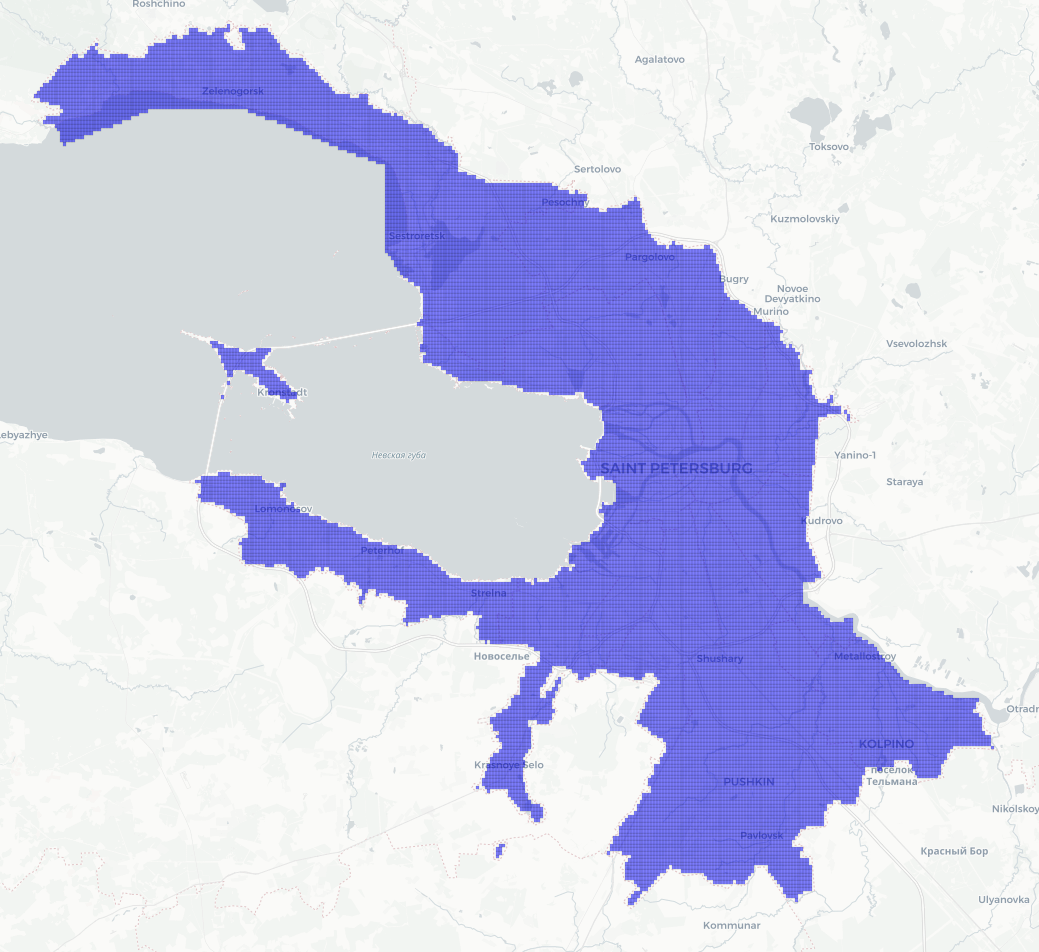

In [21]:
Image("C://Users/Art/PycharmProjects/EPAM_final/Slides/3.png")

***Предсказание стоимости по недостающим точкам***

    - модель - KNeighborsRegressor
    - подбор гиперпараметров модели - GridSearchCV
    - обучение модели на подготовленной выборке (полигон-цена)
    - предсказание для сетки полигонов в границах города

***Визуализация данных***

    - нанесение предсказаний на карту
    - построение гисторграмм

***Результаты***

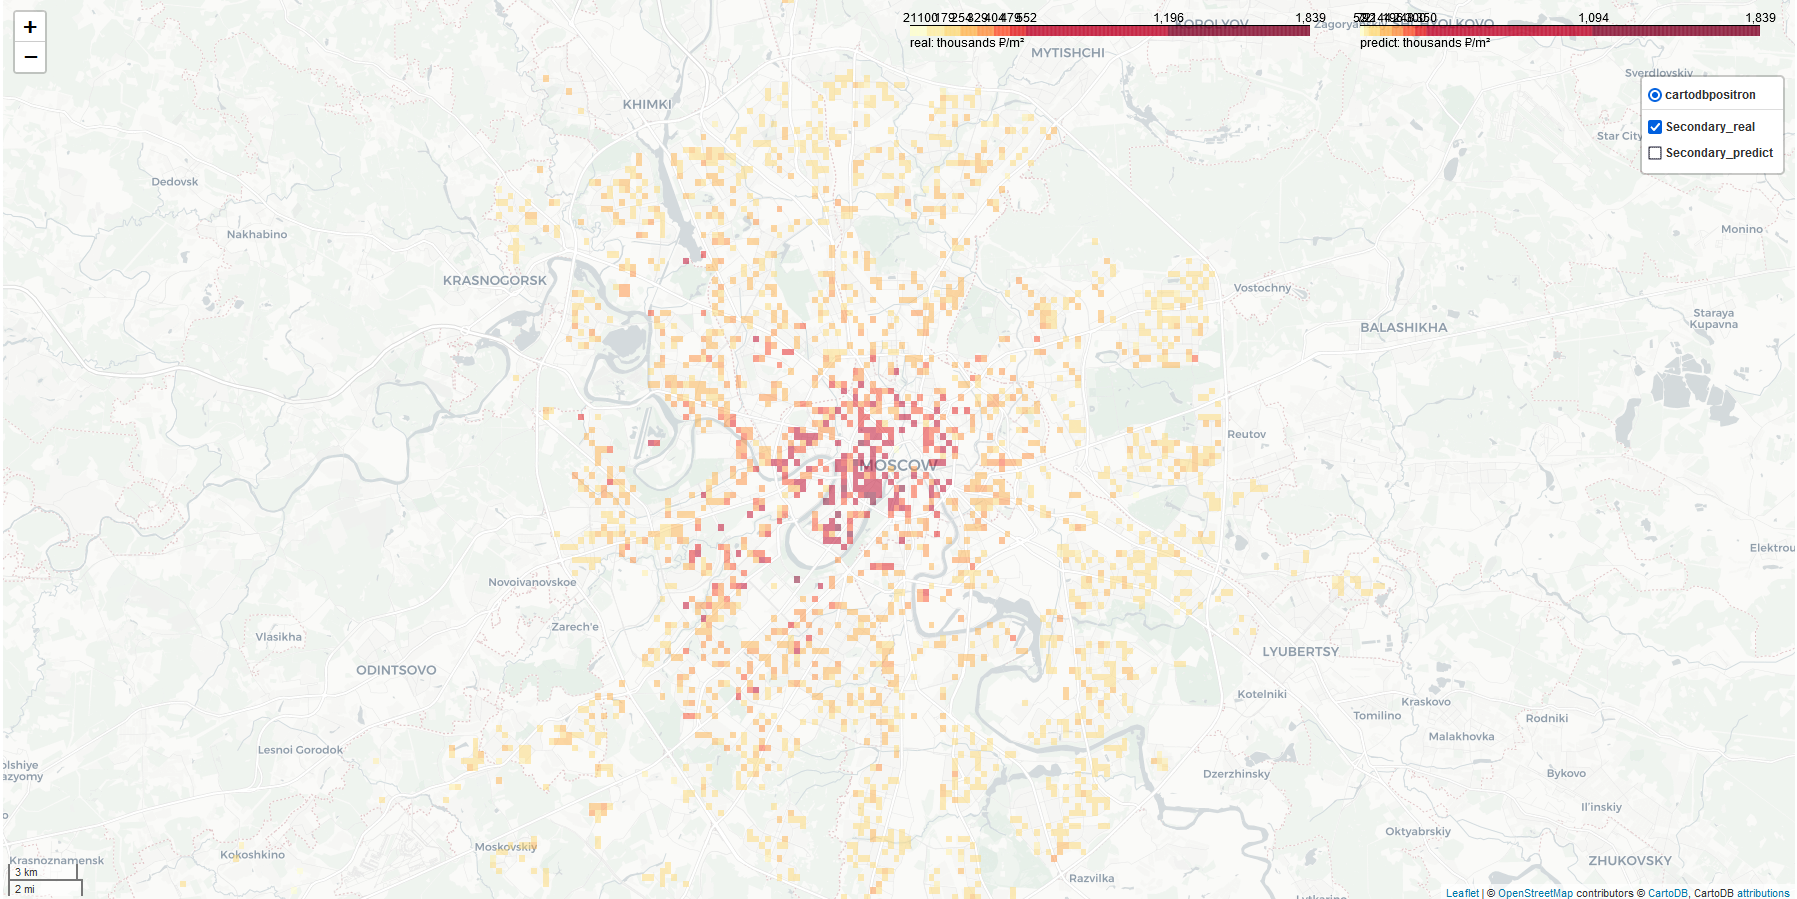

In [3]:
Image("C://Users/Art/Desktop/4.png")

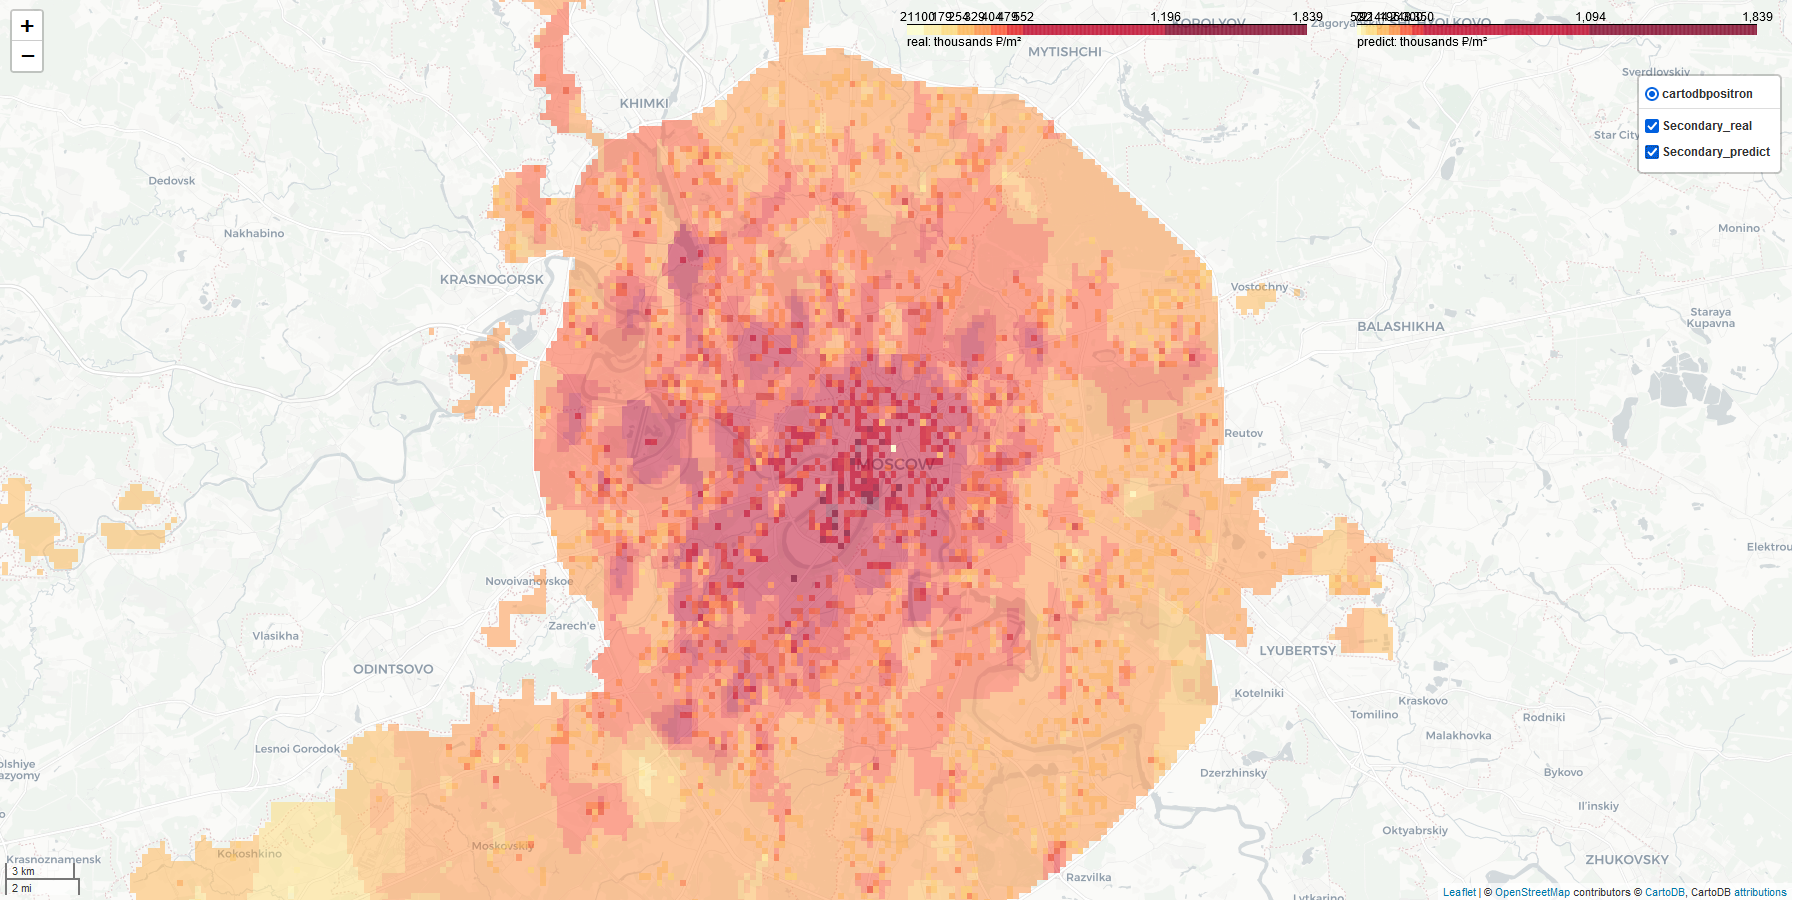

In [4]:
Image("C://Users/Art/Desktop/5.png")

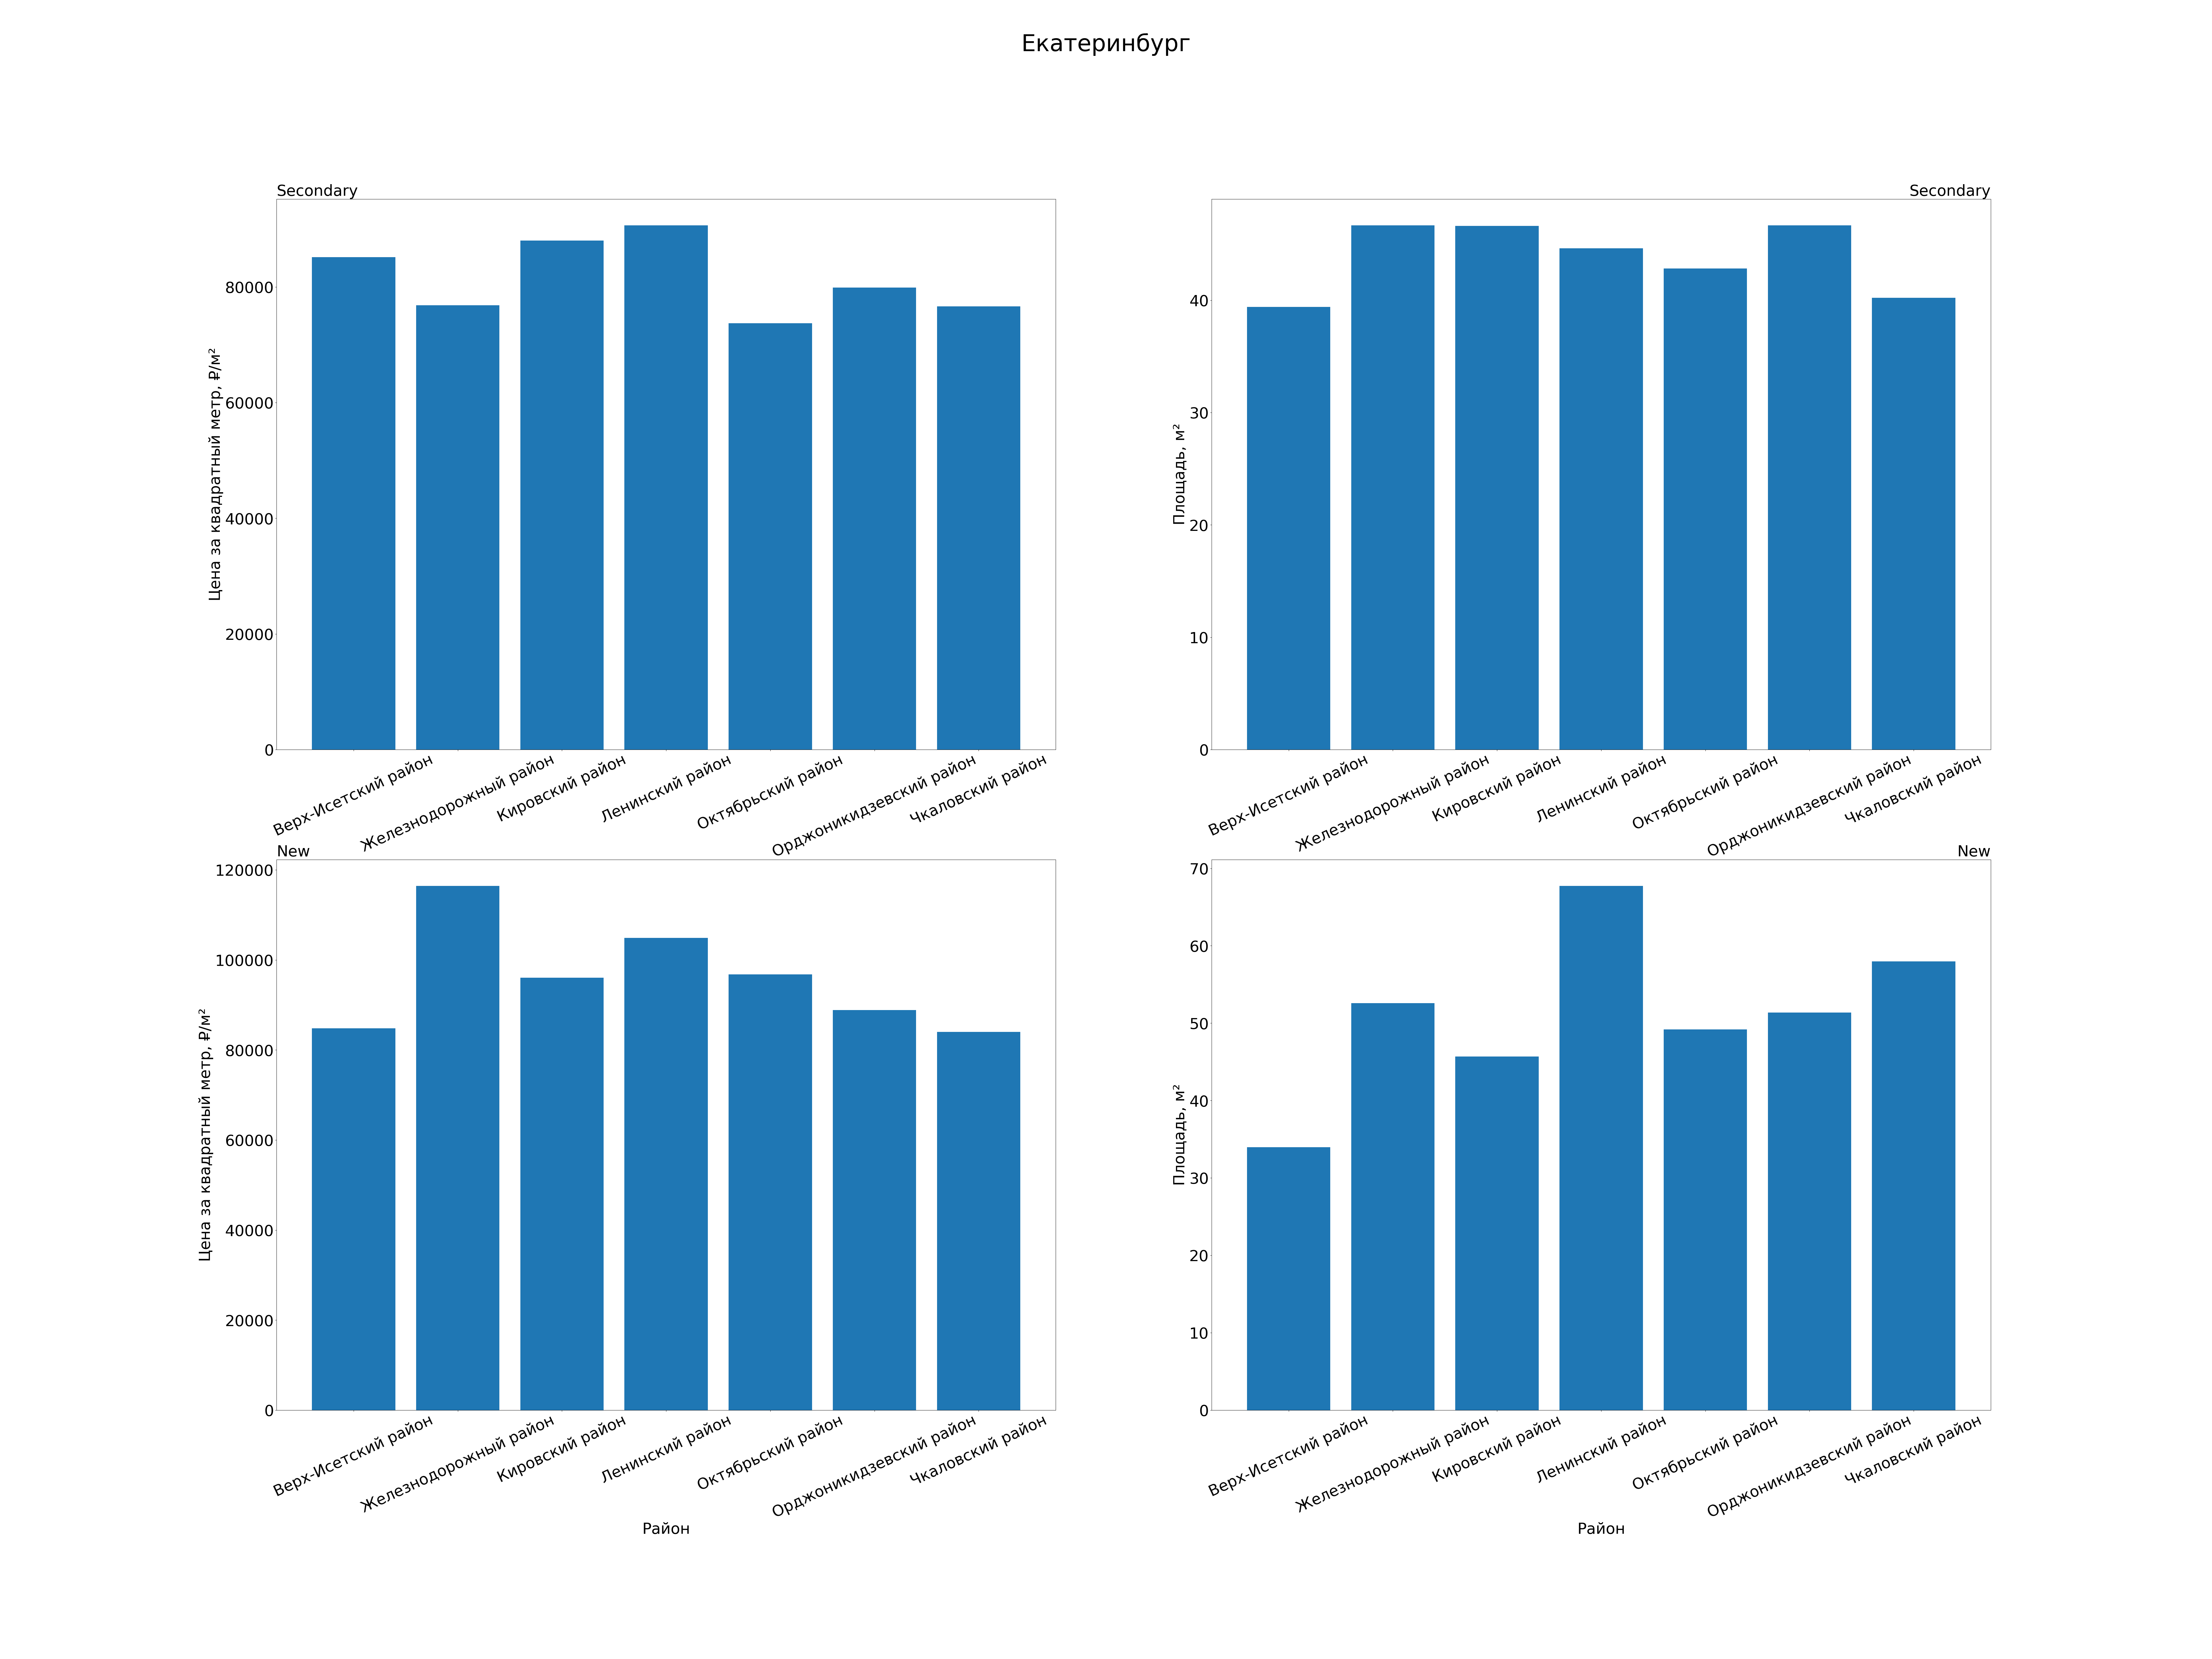

In [29]:
Image("C://Users/Art/PycharmProjects/EPAM_final/Slides/6.png")

***Выводы***

    - недостаточно исходных данных (для СПб в модели train: 1914 в модели predict: 22320)
    - уменишить шаг ячейки ()
    - изменить пороговые значения цветовой схемы
    - поработать с оформлением результатов
    
    - адаптировать готовые решения
    
        https://habr.com/ru/post/335638/ - описание
        https://kvartiri-domiki.ru/karta-cen?55.718676263088916,37.85590931396484&10&3&245 - реализация
        
        https://github.com/jeffkaufman/apartment_prices - репозиторий
        https://www.jefftk.com/apartment_prices/#2021-06-19&2 - реализация
        
